In [1]:
import cv2
import sys
sys.path.append("../")
import anchors
import data
from matplotlib import pyplot as plt
import numpy as np
import pickle
import matplotlib
%matplotlib notebook

In [2]:
norm = True
data_train = pickle.load(file = open('../wider_train.p', 'rb'))
svc = data.DataService(data_train, False, '../../WIDER/train_images/', (1024, 1024)
                      ,normalised = norm)
CONFIG = [[1024, 1024, 32, 32, 32, 32, 4], 
          [1024, 1024, 32, 32, 64, 64, 2],
          [1024, 1024, 32, 32, 128, 128, 1],
          [1024, 1024, 64, 64, 256, 256, 1],
          [1024, 1024, 128, 128, 512, 512, 1]] 
boxes_vec, boxes_lst, stubs = anchors.get_boxes(CONFIG, norm)

In [3]:
def print_image(img_in, boxes, normalised = norm):
    img = img_in.copy()
    h, w, _ = img.shape
    for box in boxes:
        if normalised:
            cv2.rectangle(img, (int(box[0]*h),int(box[1]*w)), (int(box[2]*h), int(box[3]*w)), (0,255,0), 3)
        else:
            cv2.rectangle(img, (int(box[0]),int(box[1])), (int(box[2]), int(box[3])), (0,255,0), 3)
    plt.figure()
    plt.imshow(img)
    plt.show()

### Test encode

In [4]:
i = 223
img = svc.read_image(data_train[i]['file_path'])
boxes = [data_train[i]['bbox']]
imgs, boxes = svc.resize_images([img], boxes)
if norm:
    boxes = [i/np.tile((1024, 1024), 2) for i in boxes]
locs, confs_o = anchors.encode(boxes_vec, boxes[0], threshold = 0.35)
confs = np.eye(2)[confs_o.astype(int)]
boxes_preds, _, _ = anchors.decode(boxes_vec, locs, confs, do_nms = True)
test_loc, test_confs = pickle.load(file=open('../check.pickle', 'rb'))
print(test_loc[test_confs == 1])
print('######')
print(locs[confs_o == 1])
# print_image(imgs[0], boxes[0])
# print_image(imgs[0], boxes_preds)

[[ 1.171875    2.8815627   1.1157178  -0.2355324 ]
 [-1.328125    2.8815627   1.1157178  -0.2355324 ]
 [ 3.671875    0.3815627   1.1157178  -0.2355324 ]
 [ 1.171875    0.3815627   1.1157178  -0.2355324 ]
 [-1.328125    0.3815627   1.1157178  -0.2355324 ]
 [-3.828125    0.3815627   1.1157178  -0.2355324 ]
 [ 3.671875   -2.1184373   1.1157178  -0.2355324 ]
 [ 1.171875   -2.1184373   1.1157178  -0.2355324 ]
 [-1.328125   -2.1184373   1.1157178  -0.2355324 ]
 [-0.46875     3.1845427  -0.3226926  -2.2492902 ]
 [ 5.3125      0.11908531  3.1430433   1.2164457 ]
 [ 2.8125      0.11908531  3.1430433   1.2164457 ]
 [ 2.03125     0.68454266 -0.3226926  -2.2492902 ]
 [ 0.3125      0.11908531  3.1430433   1.2164457 ]
 [-2.1875      0.11908531  3.1430433   1.2164457 ]
 [-0.46875     0.68454266 -0.3226926  -2.2492902 ]
 [-4.6875      0.11908531  3.1430433   1.2164457 ]
 [-2.96875     0.68454266 -0.3226926  -2.2492902 ]
 [ 2.8125     -2.3809147   3.1430433   1.2164457 ]
 [ 2.03125    -1.8154573  -0.32

## Encode/Decode Test

mAP:  0.09757987161514056


<IPython.core.display.Javascript object>


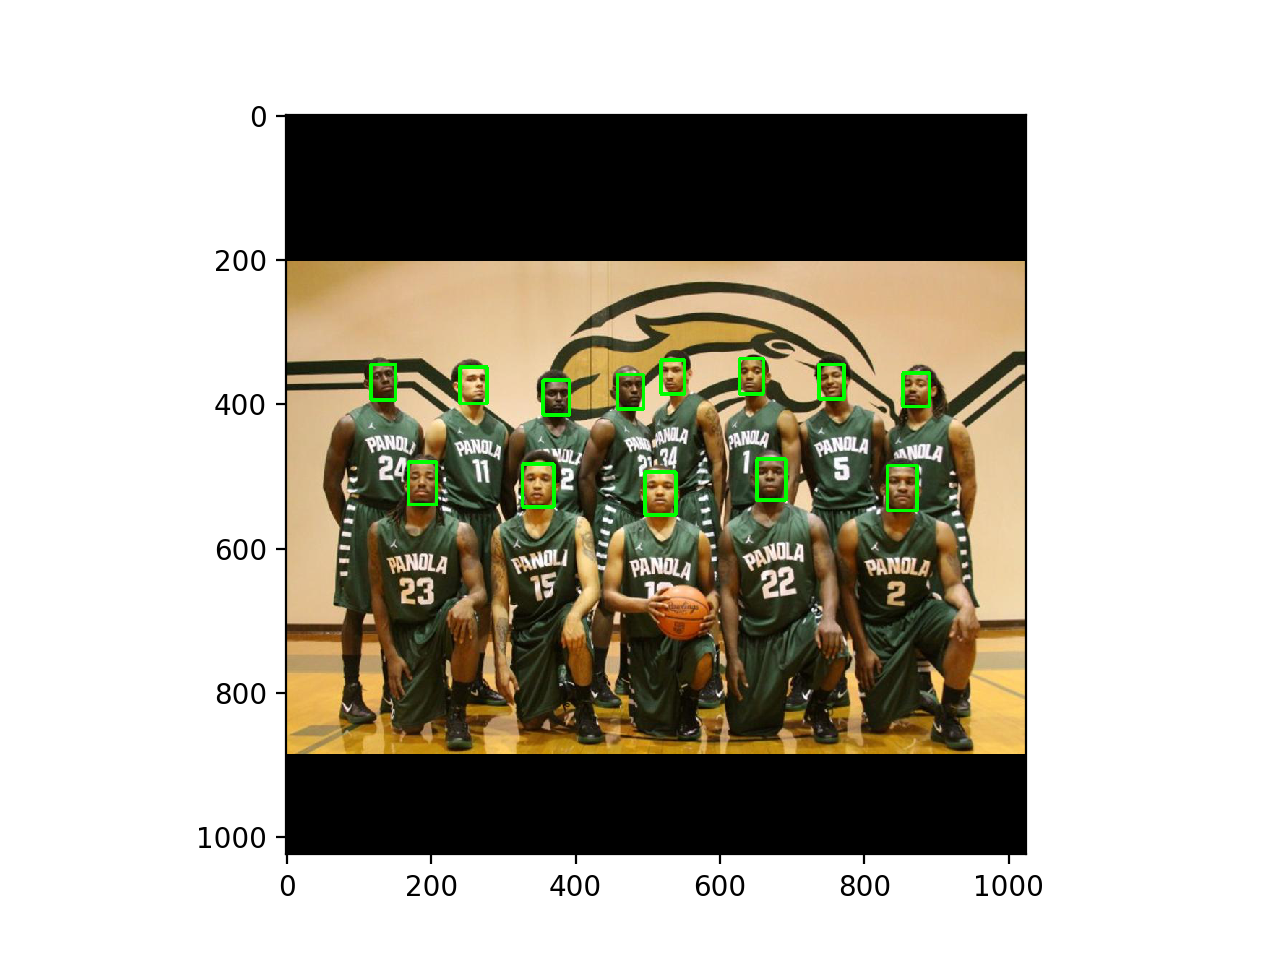

<IPython.core.display.Javascript object>


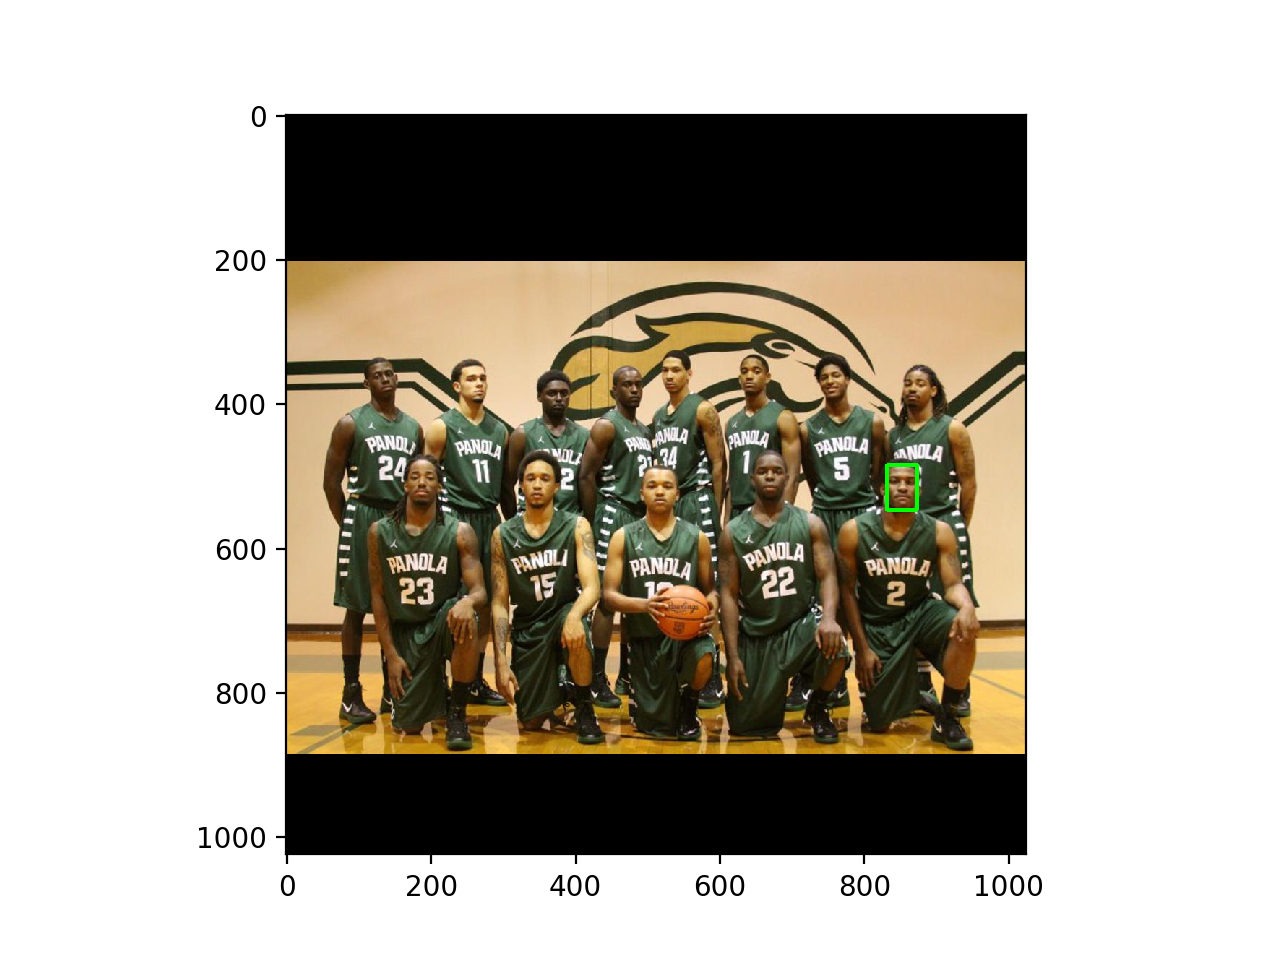

In [7]:
imgs, lbls = svc.random_sample(5)
i = 2
locs, confs_o = anchors.encode(boxes_vec, lbls[i], threshold = 0.05)
# locs[confs_o==1] = np.random.uniform(-5, 5, locs[confs_o==1].shape)
confs = np.eye(2)[confs_o.astype(int)]
boxes_preds, _, _ = anchors.decode(boxes_vec, locs, confs, do_nms = False)
print('mAP: ', anchors.compute_mAP([imgs[i]], [lbls[i]], [boxes_preds],normalised = norm))
print_image(imgs[i], lbls[i])
print_image(imgs[i], boxes_preds)